In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [15]:


!cd yolov5

In [29]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


Using cache found in /home/ayoub/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-11 torch 1.8.2+cu102 CPU

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [17]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [18]:
results = model(img)
results.print()

image 1/1: 533x800 37 cars, 4 trucks
Speed: 793.2ms pre-process, 496.7ms inference, 142.3ms NMS per image at shape (1, 3, 448, 640)


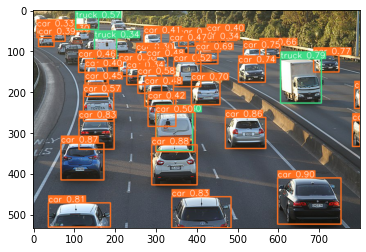

In [19]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()


In [20]:
results.render()


[array([[[251, 216, 174],
         [254, 219, 177],
         [246, 213, 168],
         ...,
         [128, 148, 146],
         [ 70,  79,  52],
         [ 64,  71,  29]],
 
        [[235, 201, 156],
         [234, 200, 155],
         [221, 189, 142],
         ...,
         [122, 141, 139],
         [ 85,  91,  65],
         [ 47,  52,  11]],
 
        [[253, 219, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [136, 155, 153],
         [ 69,  73,  46],
         [ 60,  62,  22]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

In [30]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [5]:
import uuid   # Unique identifier
import os
import time


In [35]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ["awake", "drowsy"]
number_imgs = 5


In [36]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [37]:
!pip install pyqt5 lxml --upgrade

  Using cached PyQt5-5.15.4-cp36.cp37.cp38.cp39-abi3-manylinux2014_x86_64.whl (8.3 MB)
     |████████████████████████████████| 313 kB 785 kB/s eta 0:00:01
  Using cached PyQt5_Qt5-5.15.2-py3-none-manylinux2014_x86_64.whl (59.9 MB)


In [42]:
!cd labelImg

In [ ]:
!python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 5 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 2021-10-10 torch 1.8.2+cu102 CPU

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0,

     9/499        0G     0.101    0.0218   0.07034        10       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36       0.19     0.0278     0.0149    0.00575

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/499        0G    0.1013   0.02373   0.06828        13       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.159     0.0556     0.0203     0.0063

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/499        0G   0.09844   0.01816   0.06966         6       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36     0.0327     0.0556    0.00719   0.000814

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    12/499        0G   0.09716   0.02


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    60/499        0G   0.05753    0.0199   0.02882        14       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.605      0.972      0.824      0.424

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    61/499        0G   0.05747   0.01587   0.03046         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.412      0.778      0.447     0.0863

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    62/499        0G   0.05882    0.0189   0.02923        11       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.678      0.944      0.813      0.422

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   111/499        0G   0.05211   0.01401   0.01156         5       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.539      0.939      0.763      0.284

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   112/499        0G   0.05568     0.012   0.01203         8       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.765      0.944      0.938      0.506

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   113/499        0G   0.04741    0.0121   0.01054         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.641      0.944       0.87       0.38

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   162/499        0G   0.04831    0.0104   0.01207         6       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.931      0.999      0.995      0.518

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   163/499        0G   0.04814  0.009696  0.008082         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.516      0.944      0.722      0.243

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   164/499        0G   0.05468  0.009724  0.007306         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.891      0.999       0.97       0.58

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   213/499        0G   0.03987   0.01073  0.006629         9       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.992          1      0.995       0.55

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   214/499        0G    0.0384  0.009613  0.006884         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36       0.99          1      0.995      0.679

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   215/499        0G   0.04082  0.009983  0.006267         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36       0.93          1      0.995      0.524

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   264/499        0G   0.03172  0.008152  0.006555         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36       0.97          1      0.986      0.674

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   265/499        0G   0.03049    0.0089  0.006284         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.998          1      0.995       0.74

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   266/499        0G   0.03619   0.01056  0.005885        11       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.997          1      0.995      0.757

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   315/499        0G   0.02688  0.008097  0.005611         9       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.977          1      0.995      0.771

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   316/499        0G   0.02552  0.007705  0.004985         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.999          1      0.995      0.767

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   317/499        0G   0.02886  0.008014  0.004721         8       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.991          1      0.995       0.73

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   366/499        0G   0.02295  0.007087   0.01067         5       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.998          1      0.995      0.839

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   367/499        0G   0.01885  0.006983  0.003822         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.998          1      0.995      0.842

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   368/499        0G   0.01891  0.005724   0.01182         5       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.997          1      0.995      0.891

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   417/499        0G   0.02096  0.005281  0.003525         5       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.998          1      0.995       0.86

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   418/499        0G   0.02134  0.006573  0.003728         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.998          1      0.995       0.86

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   419/499        0G   0.02055  0.007525  0.004747        11       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.999          1      0.995      0.846

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   468/499        0G   0.01635  0.006716  0.002897        10       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.999          1      0.995      0.879

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   469/499        0G   0.01674    0.0067  0.003615        11       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.999          1      0.995      0.868

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   470/499        0G   0.01932  0.006534  0.004647         7       320: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         36         36      0.999          1      0.995      0.868

     Epoch   gpu_mem       box      

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/best.pt')

Using cache found in /home/ayoub/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-11 torch 1.8.2+cu102 CPU

Fusing layers... 
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


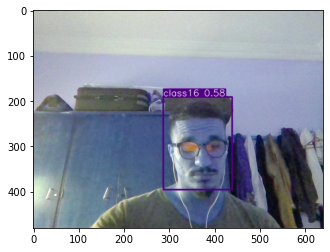

In [74]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:


cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()



In [8]:
ls


runs/  Untitled1.ipynb  Untitled.ipynb  yolov5/
